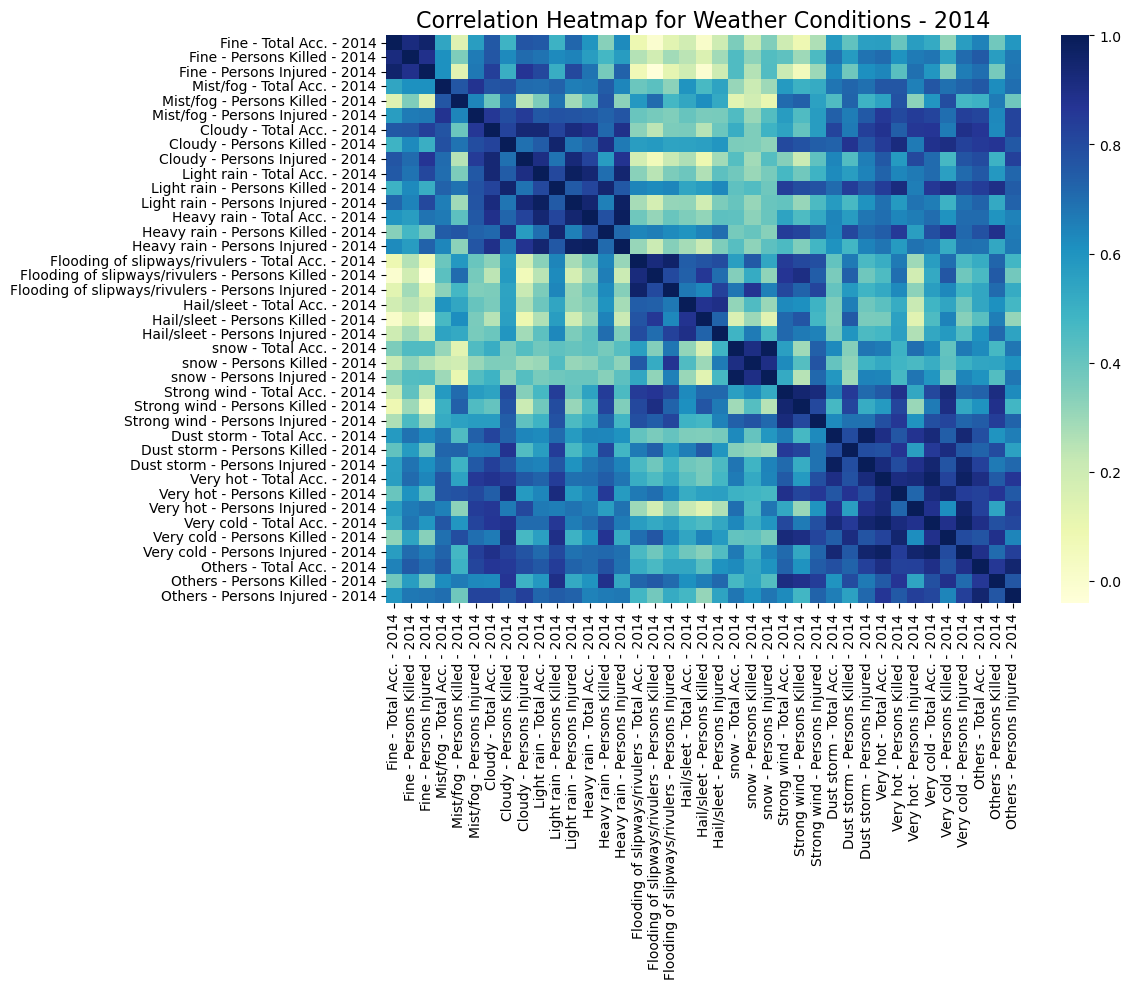

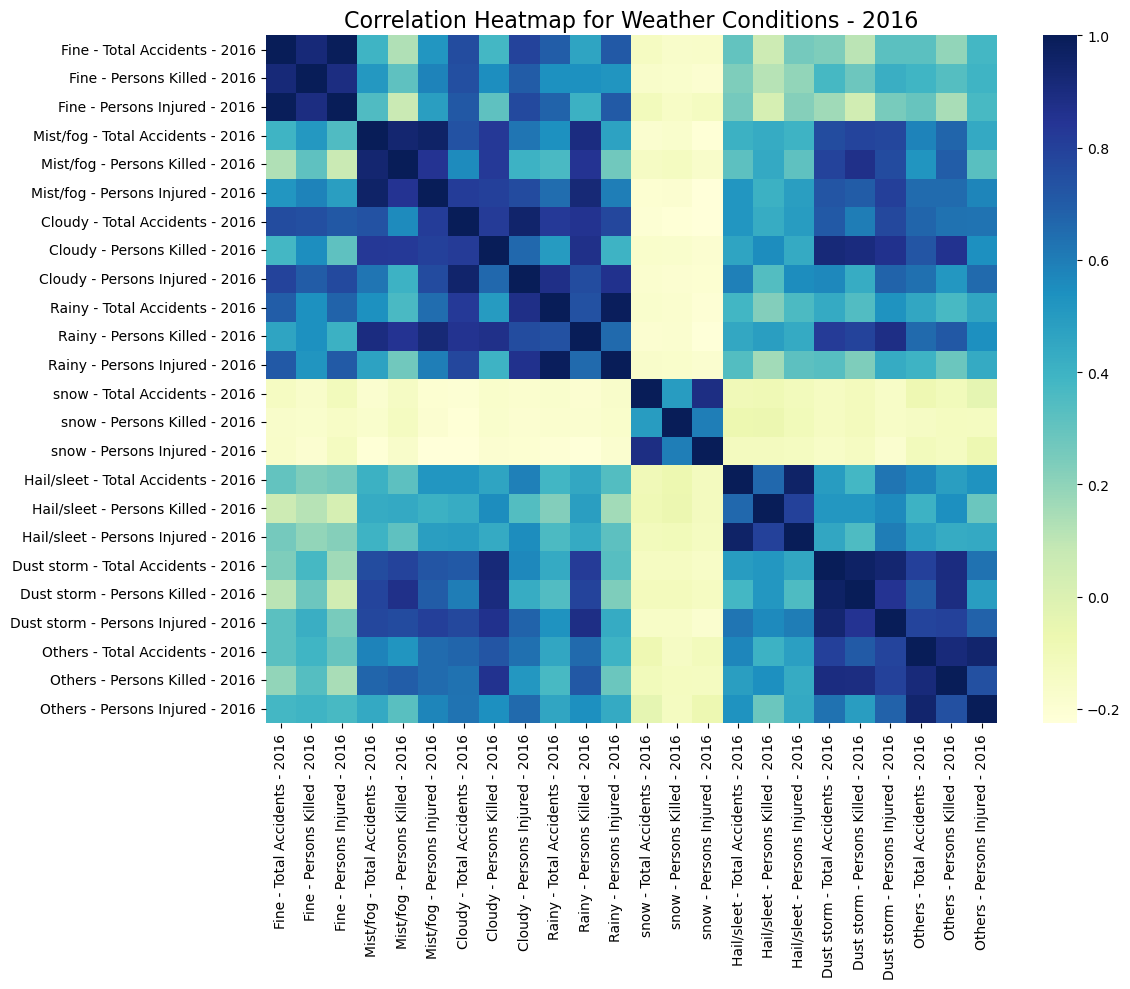

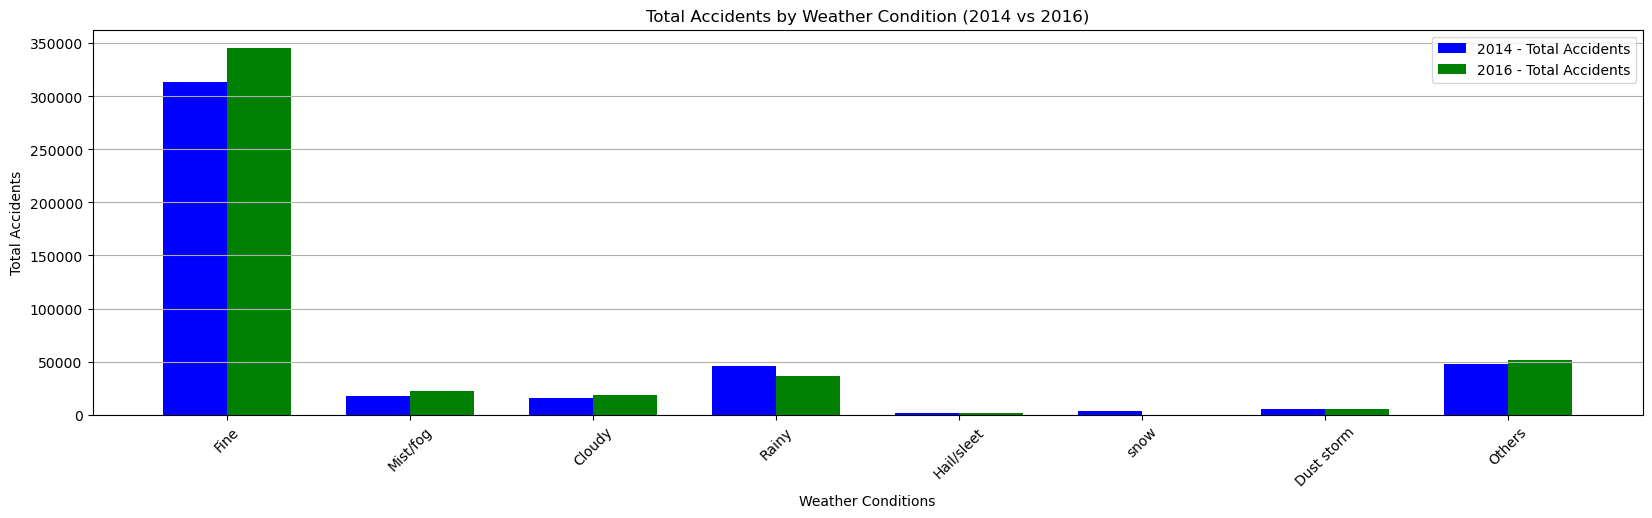

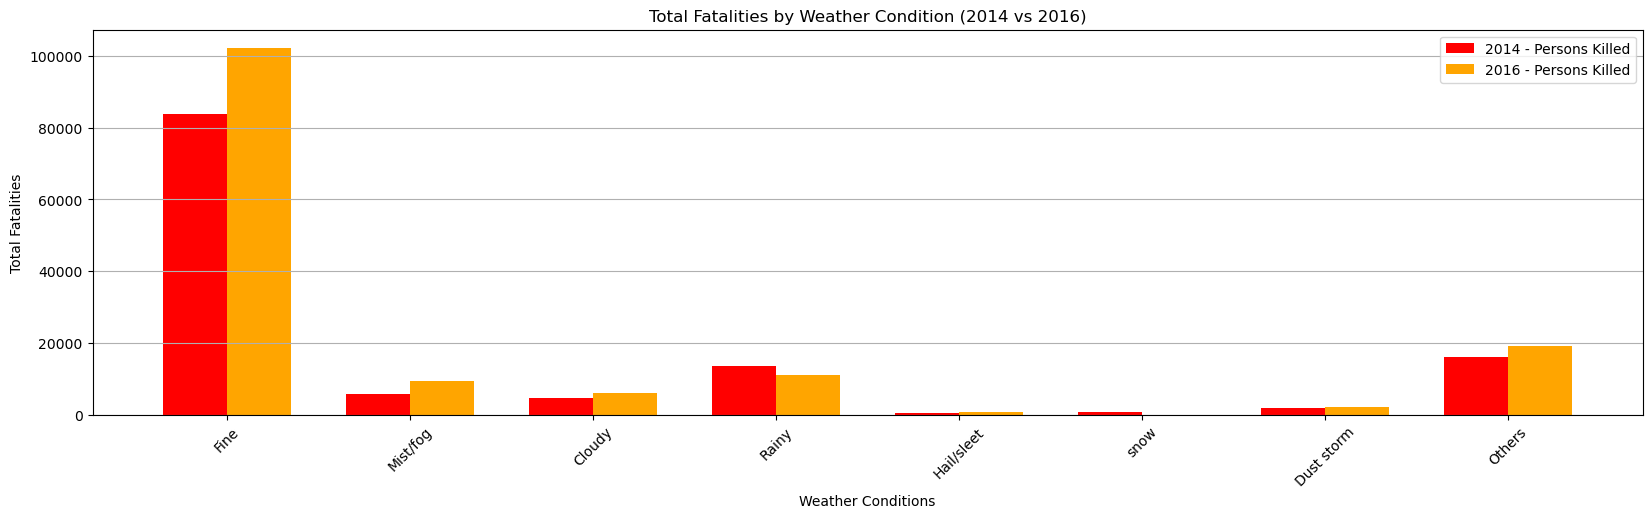

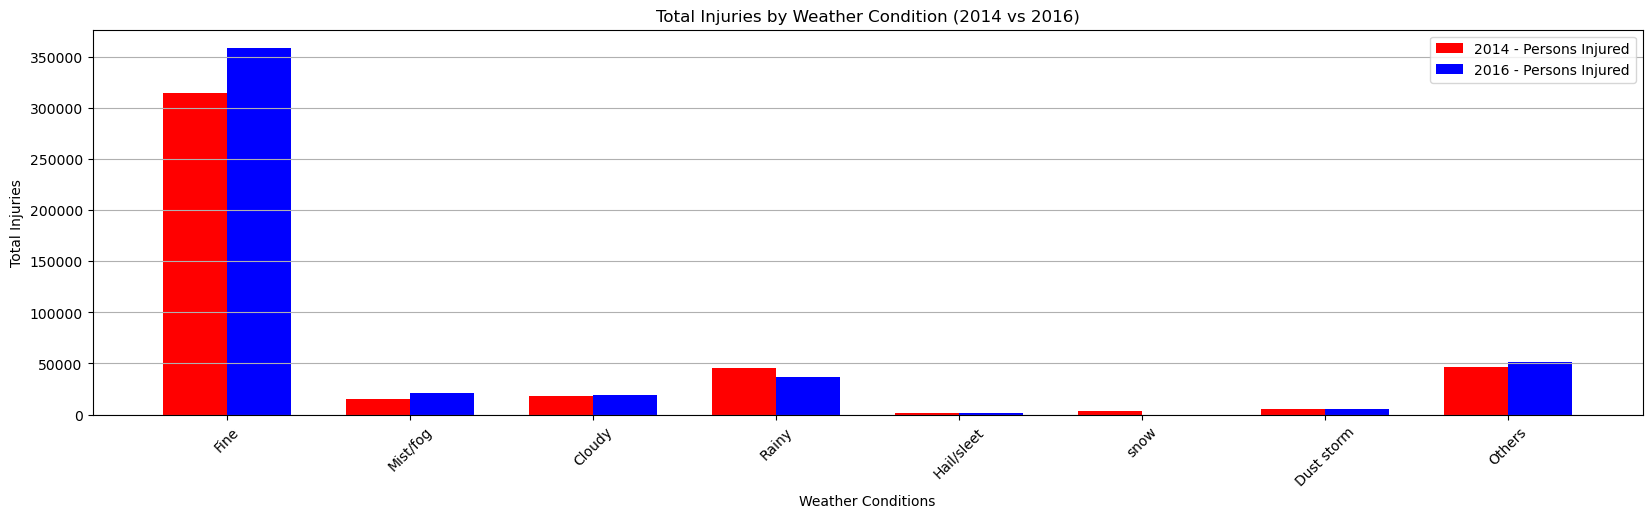

<Figure size 1800x800 with 0 Axes>

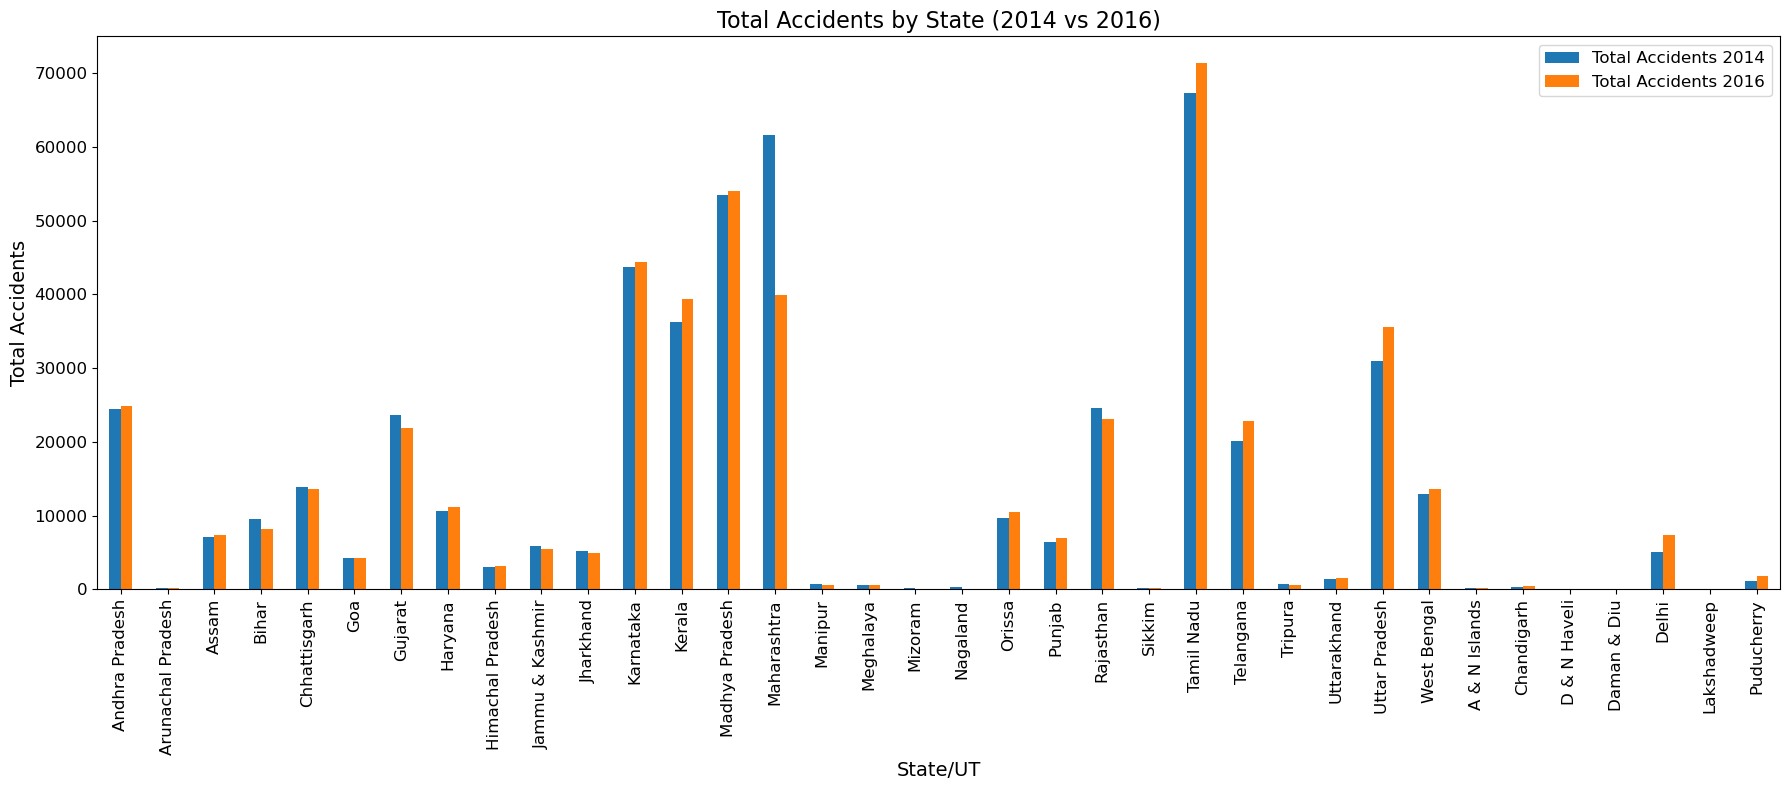

R² Score (Goodness of test)  for 2016 Accident prediction: 0.9791917525694176


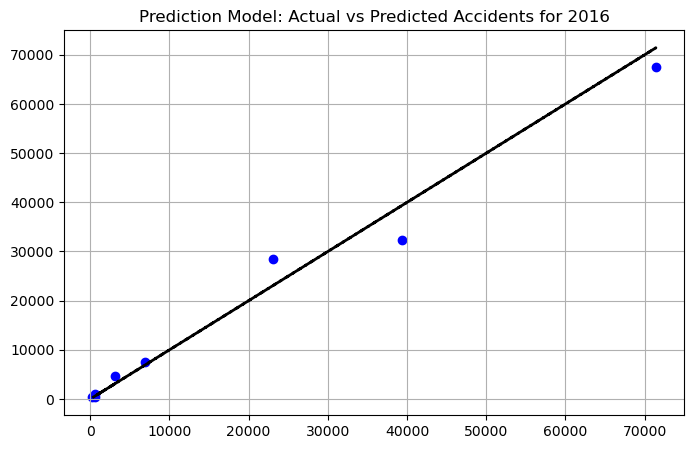

R² Score (Goodness of test) for Severity Prediction: 0.9906254740074165


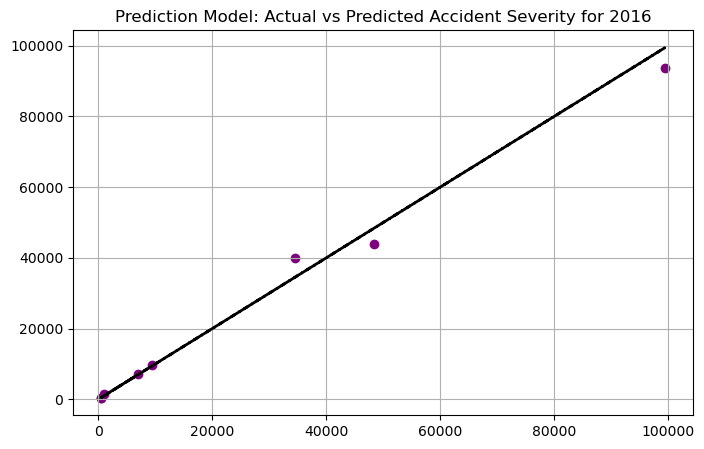

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score

# Step 1: Load and Clean the Data
df = pd.read_csv('Acc_Classified_according_to_Type_of_Weather_Condition_2014_and_2016.csv')

# Fill missing values with median values
df.fillna(df.median(numeric_only=True), inplace=True)

# Step 2: Weather Condition Impact Analysis
weather_conditions_2014 = [col for col in df.columns if '- 2014' in col]
weather_conditions_2016 = [col for col in df.columns if '- 2016' in col]

# Correlation analysis for 2014
corr_2014 = df[weather_conditions_2014].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_2014, annot=False, cmap="YlGnBu")
plt.title("Correlation Heatmap for Weather Conditions - 2014", fontsize=16)
plt.tight_layout()
plt.show()

# Correlation analysis for 2016
corr_2016 = df[weather_conditions_2016].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_2016, annot=False, cmap="YlGnBu")
plt.title("Correlation Heatmap for Weather Conditions - 2016", fontsize=16)
plt.tight_layout()
plt.show()

# Step 3: Summarize Accident Data by Weather Conditions
weather_labels = ["Fine", "Mist/fog", "Cloudy", "Rainy", "Hail/sleet", "snow", "Dust storm", "Others"]

# Combine light and heavy rain columns for 2014
df["Rainy - Total Acc. - 2014"] = df["Light rain - Total Acc. - 2014"] + df["Heavy rain - Total Acc. - 2014"]
df["Rainy - Persons Killed - 2014"] = df["Light rain - Persons Killed - 2014"] + df["Heavy rain - Persons Killed - 2014"]
df["Rainy - Persons Injured - 2014"] = df["Light rain - Persons Injured - 2014"] + df["Heavy rain - Persons Injured - 2014"]


# Aggregate data for 2014 and 2016
total_accidents_2014 = [df[f"{condition} - Total Acc. - 2014"].sum() if f"{condition} - Total Acc. - 2014" in df.columns else 0 for condition in weather_labels]
total_accidents_2016 = [df[f"{condition} - Total Accidents - 2016"].sum() if f"{condition} - Total Accidents - 2016" in df.columns else 0 for condition in weather_labels]
persons_killed_2014 = [df[f"{condition} - Persons Killed - 2014"].sum() if f"{condition} - Persons Killed - 2014" in df.columns else 0 for condition in weather_labels]
persons_killed_2016 = [df[f"{condition} - Persons Killed - 2016"].sum() if f"{condition} - Persons Killed - 2016" in df.columns else 0 for condition in weather_labels]
persons_injured_2014 = [df[f"{condition} - Persons Injured - 2014"].sum() if f"{condition} - Persons Injured - 2014" in df.columns else 0 for condition in weather_labels]
persons_injured_2016 = [df[f"{condition} - Persons Injured - 2016"].sum() if f"{condition} - Persons Injured - 2016" in df.columns else 0 for condition in weather_labels]

# Step 4: Plotting Accident Statistics by Weather Condition
# Plot Total Accidents by Weather Condition
# Define bar width for side-by-side bars
bar_width = 0.35
x = np.arange(len(weather_labels))  # Label locations

# Plot Total Accidents by Weather Condition (side by side)
plt.figure(figsize=(20, 5))
plt.bar(x - bar_width/2, total_accidents_2014, width=bar_width, label="2014 - Total Accidents", color='blue')
plt.bar(x + bar_width/2, total_accidents_2016, width=bar_width, label="2016 - Total Accidents", color='green')
plt.title("Total Accidents by Weather Condition (2014 vs 2016)")
plt.xlabel("Weather Conditions")
plt.ylabel("Total Accidents")
plt.xticks(x, weather_labels, rotation=45)
plt.legend()
plt.grid(True, axis='y')
plt.show()

# Plot Total Fatalities by Weather Condition (side by side)
plt.figure(figsize=(20, 5))
plt.bar(x - bar_width/2, persons_killed_2014, width=bar_width, label="2014 - Persons Killed", color='red')
plt.bar(x + bar_width/2, persons_killed_2016, width=bar_width, label="2016 - Persons Killed", color='orange')
plt.title("Total Fatalities by Weather Condition (2014 vs 2016)")
plt.xlabel("Weather Conditions")
plt.ylabel("Total Fatalities")
plt.xticks(x, weather_labels, rotation=45)
plt.legend()
plt.grid(True, axis='y')
plt.show()

# Plot Total Injuries by Weather Condition (side by side)
plt.figure(figsize=(20, 5))
plt.bar(x - bar_width/2, persons_injured_2014, width=bar_width, label="2014 - Persons Injured", color='red')
plt.bar(x + bar_width/2, persons_injured_2016, width=bar_width, label="2016 - Persons Injured", color='blue')
plt.title("Total Injuries by Weather Condition (2014 vs 2016)")
plt.xlabel("Weather Conditions")
plt.ylabel("Total Injuries")
plt.xticks(x, weather_labels, rotation=45)
plt.legend()
plt.grid(True, axis='y')
plt.show()

# Step 5: Regional Analysis
# Calculate state-level total accidents, fatalities, and injuries for 2014
df['Total Accidents 2014'] = df[
[col for col in df.columns if 'Total Acc.' in col and '- 2014' in col and 'Rainy - Total Acc.' not in col]].sum(axis=1)
df['Total Fatalities 2014'] = df[
[col for col in df.columns if 'Persons Killed' in col and '- 2014' in col and 'Rainy - Persons Killed' not in col]].sum(axis=1)
df['Total Injuries 2014'] = df[
    [col for col in df.columns if 'Persons Injured' in col and '- 2014' in col and 'Rainy - Persons Injured' not in col]
].sum(axis=1)

# Calculate state-level total accidents, fatalities, and injuries for 2016
df['Total Accidents 2016'] = df[[col for col in df.columns if 'Total Accidents' in col and '- 2016' in col]].sum(axis=1)
df['Total Fatalities 2016'] = df[[col for col in df.columns if 'Persons Killed' in col and '- 2016' in col]].sum(axis=1)
df['Total Injuries 2016'] = df[[col for col in df.columns if 'Persons Injured' in col and '- 2016' in col]].sum(axis=1)

# Plotting total accidents per state for 2014 and 2016
plt.figure(figsize=(18, 8))
df_plot = df.set_index('State/ UT')[['Total Accidents 2014', 'Total Accidents 2016']]
df_plot.plot(kind='bar', figsize=(18,8))
plt.title("Total Accidents by State (2014 vs 2016)", fontsize=16)
plt.xlabel("State/UT", fontsize=14)
plt.ylabel("Total Accidents", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Step 6: Prediction Model for Accident Data
# Define features (X) and target (y) for accident prediction
X = df[['Total Accidents 2014', 'Total Fatalities 2014', 'Total Injuries 2014']]
y = df['Total Accidents 2016']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)



print("R² Score (Goodness of test)  for 2016 Accident prediction:", r2)


# Plot Predicted vs Actual values for Total Accidents 2016
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test,y_test,'k--',lw=2)
plt.title("Prediction Model: Actual vs Predicted Accidents for 2016")
plt.grid(True)
plt.show()

# Step 7: Prediction Model for Accident Severity
# Define features (X) and target (y) for accident severity prediction
df['Severity 2016'] = df['Total Fatalities 2016'] + df['Total Injuries 2016']
X = df[['Total Accidents 2014', 'Total Fatalities 2014', 'Total Injuries 2014']]
y = df['Severity 2016']

# Train and evaluate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)


print("R² Score (Goodness of test) for Severity Prediction:", r2)


# Plot Predicted vs Actual values for Severity
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='purple')
plt.plot(y_test,y_test,'k--',lw=2)
plt.title("Prediction Model: Actual vs Predicted Accident Severity for 2016")
plt.grid(True)
plt.show()
df.to_csv('project.csv')